In [1]:
import tweepy
import os
import numpy as np
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt

In [2]:
orig_working_directory = os.getcwd()
print(orig_working_directory)

C:\Users\dinom\Desktop\DinoM_GW_HW\06 python api\Twitter-API-Instructions


In [3]:
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [5]:
target_terms = ("@BBC", "@CBS", "@CNN","@FoxNews", "@NyTimes")

min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500

# List to hold results
tweets_list = []
search_term_list = []

In [6]:
for target in target_terms:
    
    # Iterate through the first 100 tweets
    for tweet in tweepy.Cursor(api.user_timeline, target, tweet_mode='extended').items(100):
        tweets_list.append(tweet)    
        search_term_list.append(target)

In [7]:
user_list = []
tweet_text_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
date = []

# Loop through all tweets
for tweet in tweets_list:
        created_at = tweet.created_at
        tweet_user = tweet.user.screen_name
        tweet_text = tweet.full_text
        results = analyzer.polarity_scores(tweet_text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        # Add each value to the appropriate list
        date.append(created_at)
        user_list.append(tweet_user)
        tweet_text_list.append(tweet_text)
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)

In [45]:
results_df = pd.DataFrame({
    'Create Date': date,
    'User': user_list,
    'Tweet Text': tweet_text_list,
    'Compound Score': compound_list,
    'Positive': positive_list,
    'Neutral': negative_list,
    'Negative': neutral_list})

pd.set_option('display.max_colwidth', -1)

results_df = results_df.sort_values(['Create Date'], ascending=True)
results_df.head()

C:\Users\dinom\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # This is added back by InteractiveShellApp.init_path()


,Create Date,User,Tweet Text,Compound Score,Positive,Neutral,Negative
99,2020-05-14 11:01:00,BBC,Two of the nation’s favourite film critics @KermodeMovie and @simonmayo are turning their critical attention from cinema to the living room. 🙌\n\nKermode and Mayo's Home Entertainment Service | Starts this Friday | 8:30pm | @BBCFour &amp; @BBCiPlayer. \n\n👉 https://t.co/2wKQd7FCd5 https://t.co/IVzVBuFDGP,-0.1779,0.057,0.091,0.852
98,2020-05-14 13:01:00,BBC,The face of someone about to VERY seriously judge a dessert... 🧐🤔\n\n@BBCR1 presenter and children's author @gregjames and co-author @itschrissmith are guest judges on tonight's #GreatBritishMenu dessert final! 🍧\n\n8pm | @bbctwo &amp; @bbciplayer.\n\n👉https://t.co/uKlD2vmATB https://t.co/cswwgVXro1,-0.4621,0.000,0.064,0.936
399,2020-05-14 14:21:27,FoxNews,https://t.co/LZeY6dCmkY,0.0000,0.000,0.000,1.000
97,2020-05-14 15:00:23,BBC,RT @BBCNewsbeat: The #Eurovision acts have recorded this message to fans who would normally be watching this week.\n \nIt's part of our new d…,0.0000,0.000,0.000,1.000
96,2020-05-14 16:01:00,BBC,"It took a group of volunteers 45 minutes to rescue a wild horse stuck in a deep mud hole in the foothills of Alberta, Canada.\nhttps://t.co/dKCWJ9NSb4",0.3182,0.113,0.068,0.819


In [46]:
results_df['Create Date'].min()

Timestamp('2020-05-14 11:01:00')

In [32]:
results_df['User'].unique()

array(['BBC', 'FoxNews', 'CBS', 'nytimes', 'CNN'], dtype=object)

In [33]:
scatter = results_df[['User','Create Date','Compound Score']]
scatter_bbc = scatter.loc[scatter['User'] == 'BBC']
scatter_fox = scatter.loc[scatter['User'] == 'FoxNews']
scatter_cbs = scatter.loc[scatter['User'] == 'CBS']
scatter_nytimes = scatter.loc[scatter['User'] == 'nytimes']
scatter_cnn = scatter.loc[scatter['User'] == 'CNN']

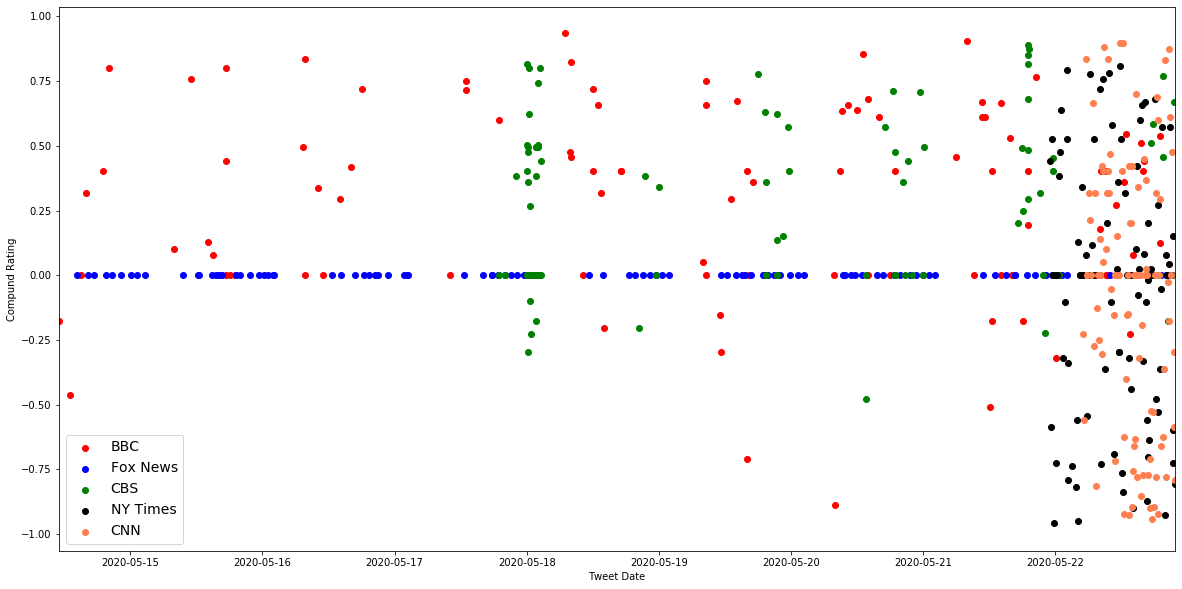

In [103]:
width = 20
height = 10
plt.figure(figsize=(width, height))

x_values = scatter_bbc['Create Date']
y_values = scatter_bbc['Compound Score']
bbc = plt.scatter(x_values,y_values, c='red')

x_values = scatter_fox['Create Date']
y_values = scatter_fox['Compound Score']
fox = plt.scatter(x_values,y_values, c='blue')

x_values = scatter_cbs['Create Date']
y_values = scatter_cbs['Compound Score']
cbs = plt.scatter(x_values,y_values, c='green')

x_values = scatter_nytimes['Create Date']
y_values = scatter_nytimes['Compound Score']
nytimes = plt.scatter(x_values,y_values, c='black')

x_values = scatter_cnn['Create Date']
y_values = scatter_cnn['Compound Score']
cnn = plt.scatter(x_values,y_values, c='coral')

plt.xlim(results_df['Create Date'].min(), results_df['Create Date'].max())

plt.legend((bbc, fox, cbs, nytimes, cnn),
           ('BBC', 'Fox News', 'CBS', 'NY Times', 'CNN'),
           scatterpoints=1,
           loc='best',
           fontsize=14)

plt.xlabel('Tweet Date')
plt.ylabel('Compund Rating')

plt.savefig('Scatter_Plot.png')

plt.show()

In [57]:
grp_user = results_df.groupby(['User'])['Compound Score'].mean()
grp_user = pd.DataFrame(grp_user)
grp_user

,Compound Score
User,
BBC,0.292436
CBS,0.257417
CNN,-0.068976
FoxNews,0.000000
nytimes,-0.049350


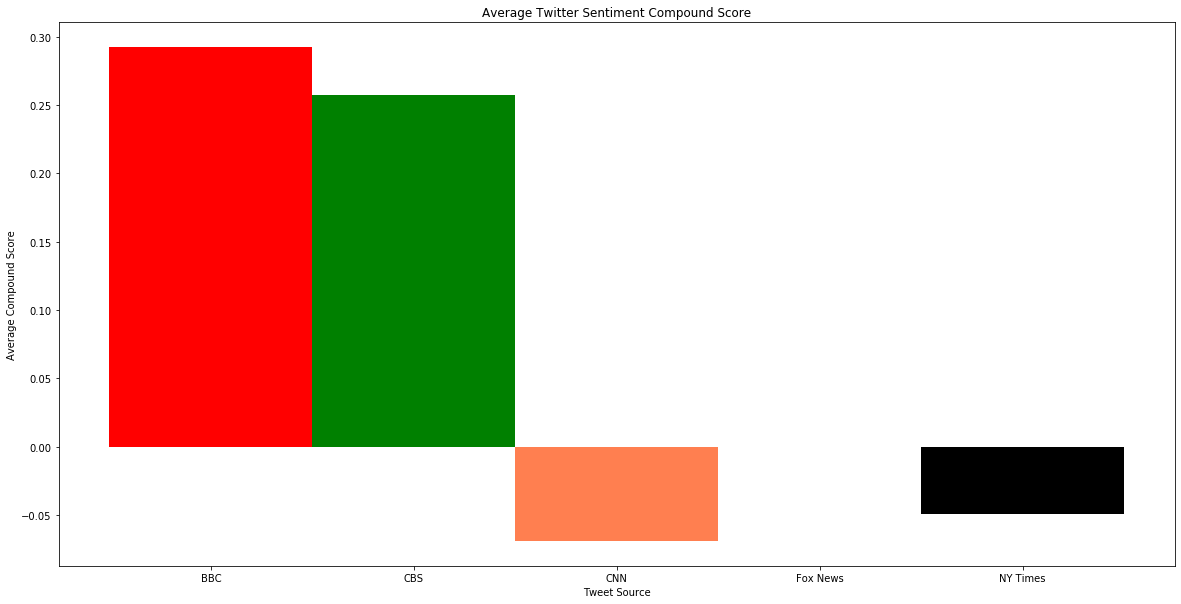

In [102]:
width = 20
height = 10
plt.figure(figsize=(width, height))


plt.title("Average Twitter Sentiment Compound Score")
plt.xlabel("Tweet Source")
plt.ylabel("Average Compound Score")
user = ['BBC', 'CBS', 'CNN', 'Fox News', 'NY Times']
sentiment = [0.292436,0.257417,-0.068976,0,-0.049350]
plt.bar(user,sentiment,width=1,color=['red', 'green', 'coral', 'blue', 'black'])

plt.savefig('Bar_Chart.png')

plt.show()